<a href="https://colab.research.google.com/github/Val-70/bank-data/blob/main/bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv("bank.csv", na_values =['NA'])
data = pd.DataFrame(data)
data.head(9)




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [19]:
data_train.shape

(4521, 17)

In [33]:
def categorize(df):
  new_df = df.copy()
  le = preprocessing.LabelEncoder()
  new_df['job'] = le.fit_transform(new_df['job'])
  new_df['marital'] = le.fit_transform(new_df['marital'])
  new_df['education'] = le.fit_transform(new_df['education'])
  new_df['default'] = le.fit_transform(new_df['default'])
  new_df['housing'] = le.fit_transform(new_df['housing'])
  new_df['month'] = le.fit_transform(new_df['month'])
  new_df['loan'] = le.fit_transform(new_df['loan'])
  new_df['contact'] = le.fit_transform(new_df['contact'])
  new_df['day'] = le.fit_transform(new_df['day'])
  new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
  new_df['y'] = le.fit_transform(new_df['y'])
  return new_df

In [20]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

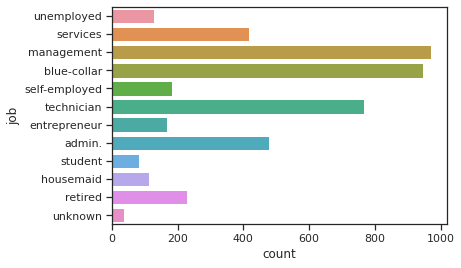

In [21]:
sns.set(style='ticks', color_codes=True)
sns.countplot(y='job', data=data)

In [22]:
data = data[data.job != 'unknown']

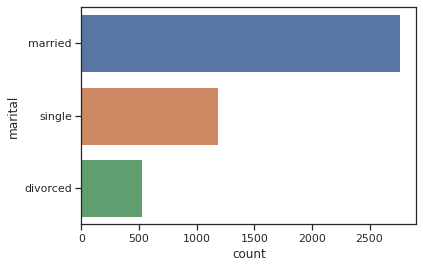

In [23]:
sns.countplot(y='marital', data=data)

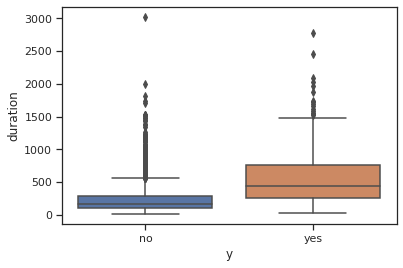

In [24]:
# outliers
sns.boxplot(x='y', y='duration', data=data)

In [27]:
data = data[data.education != 'illiterate']
data.describe()
# sns.boxplot(x='y',y='education',data=data)

,age,balance,day,duration,campaign,pdays,previous
count,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000
mean,41.111309,1421.987731,15.915905,264.360027,2.795673,39.796565,0.542940
std,10.559382,3017.124448,8.235155,260.273544,3.116897,99.910253,1.696552
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1474.000000,21.000000,329.500000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [34]:
data = categorize(data)
data = data.convert_objects(convert_numeric=True)

AttributeError: ignored